In [24]:
import cv2
import os
import sys
import numpy as np
import math
import matplotlib.pyplot as plt

rtDirectory = '/Users/ejbeazleigh/Downloads/ImageProcessing/WeedData'
train = []
labels = []
for weed in os.listdir(os.path.join(rtDirectory, 'train')):
    print(weed)
    if os.path.isdir(os.path.join(rtDirectory, 'train', weed)):
        for img in os.listdir(os.path.join(rtDirectory, 'train', weed)):
            if img.endswith(".jpg") or img.endswith(".png"):  # Adjust the file extensions as per your image types
                train.append(cv2.imread(os.path.join(rtDirectory, 'train', weed, img)))
                labels.append(weed)

new_size = (236, 236)
########## pre processing adaptive thresholding

def apply_adaptive_threshold(img):
    # convert BGR img to gray level
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply adaptive thresholding
    threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    # bitwise AND operation to remove background
    img = cv2.bitwise_and(img, img, mask=threshold)
    return img
ProcessedImages = []
for img in train:
    img = cv2.resize(img, new_size)
    img = cv2.fastNlMeansDenoising(img)
    img = apply_adaptive_threshold(img)
    ProcessedImages.append(img)



cleavers
.DS_Store
charlock


In [25]:
test = []
testlabels = []
for weed in os.listdir(os.path.join(rtDirectory, 'test')):
    print(weed)
    if os.path.isdir(os.path.join(rtDirectory, 'test', weed)):
        for img in os.listdir(os.path.join(rtDirectory, 'test', weed)):
            if img.endswith(".jpg") or img.endswith(".png"):  # Adjust the file extensions as per your image types
                test.append(cv2.imread(os.path.join(rtDirectory, 'test', weed, img)))
                testlabels.append(weed)

def processfunc(img):
    processingfunc = []
    for i in img:
        img = cv2.resize(i, (236, 236))
        img = cv2.fastNlMeansDenoising(img)
        processingfunc.append(img)
        img = apply_adaptive_threshold(img)
    return processingfunc 

test = processfunc(test)

cleavers
.DS_Store
charlock


In [26]:
######################### RGB feature extraction  ##########################
#### Feature extraction 1 - RGB
RGBtrainvals = []
for img in train:
    rgb = np.mean(np.array(img), axis=(0, 1))
    RGBtrainvals.append(rgb)
# Convert lists to numpy arrays
X_train = np.array(RGBtrainvals)
y_train = np.array(labels)
# Check the dimension of X_train and y_train
print(X_train.shape, y_train.shape)
RGBtestvals = []
for img in test:
    rgb = np.mean(np.array(img), axis=(0, 1))
    RGBtestvals.append(rgb)
# Convert lists to numpy arrays
X_test = np.array(RGBtestvals)
y_test = np.array(testlabels)
# Check the dimension of X_test and y_test
print(X_test.shape, y_test.shape)

(480, 3) (480,)
(158, 3) (158,)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10],'gamma': [0.1, 0.01, 0.001],'kernel': ['linear', 'rbf']}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Access the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
# Use the best estimator to make predictions on the test data
y_pred = best_estimator.predict(X_test)
# Evaluate the performance of the best estimator
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Test Accuracy: 0.8227848101265823
Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


Test Accuracy: 0.8227848101265823
F1-score: 0.8204160189503296
Precision: 0.8249890877346139
Recall: 0.8227848101265823


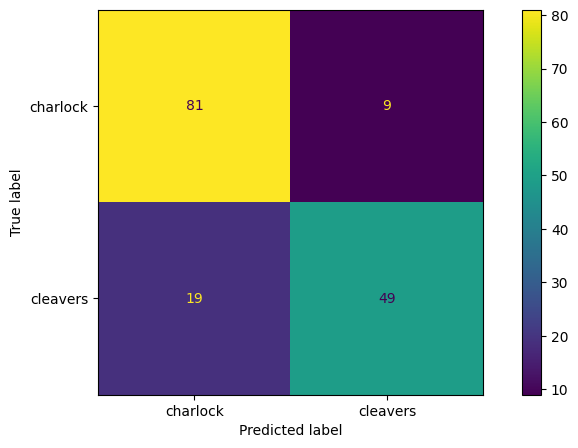

In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# Create a new instance of SVM with the best hyperparameters
best_params = {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
svm_best = SVC(**best_params)
# Fit the model to the training data
svm_best.fit(X_train, y_train)
# Predict the labels in the test dataset
test_predictions = svm_best.predict(X_test)
# Calculate the scoring metrics
test_accuracy = accuracy_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions, average='weighted')
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='weighted')
# Print the scoring metrics
print("Test Accuracy:", test_accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.keys())
fig, ax = plt.subplots(figsize=(10, 5))
disp.plot(ax=ax)
plt.show()

Test Accuracy: 0.8227848101265823
F1-score: 0.8204160189503296
Precision: 0.8249890877346139
Recall: 0.8227848101265823


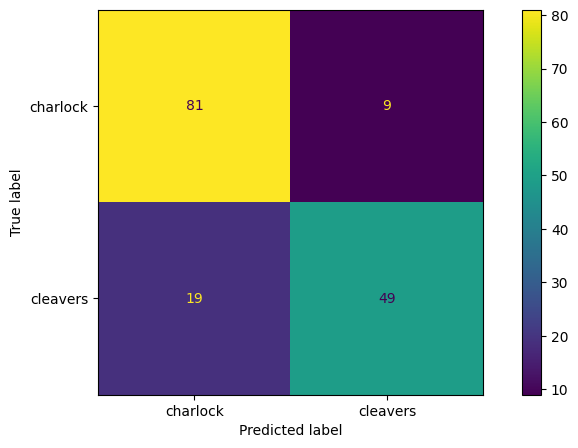

In [32]:
# Print the scoring metrics
print("Test Accuracy:", test_accuracy)
print("F1-score:", f1)
print("Precision:", precision)
print("Recall:", recall)
# Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.keys())
fig, ax = plt.subplots(figsize=(10, 5))
disp.plot(ax=ax)
plt.show()